IRIS data classification using Decision Trees

Decision Trees

Decision Tree is a Supervised learning technique that can be used for 
both classification and Regression problems, but mostly it is preferred for solving 
Classification problems. 

It is a tree-structured classifier ,where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In a Decision tree, there are two nodes, which are the Decision Node and Leaf Node. 
Decision nodes are used to make any decision and have multiple branches, whereas Leaf 
nodes are the output of those decisions and do not contain any further branches.

The decisions or the test are performed on the basis of features of the given dataset.
It is called a decision tree because, similar to a tree, it starts with the root node, which expands on further branches and constructs a tree-like structure.

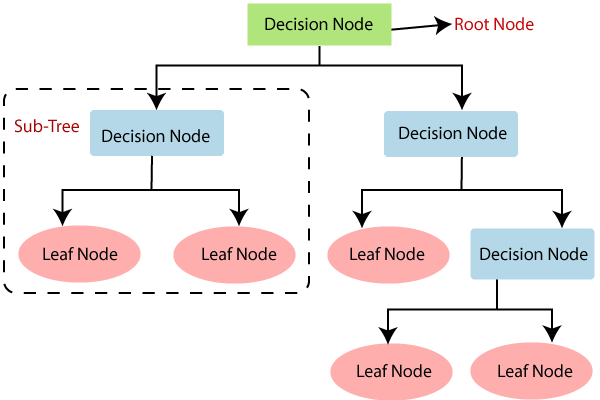


How does the Decision Tree algorithm Work?
Step-1: Begin the tree with the root node, says S, which contains the complete dataset.
Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
Step-3: Divide the S into subsets that contains possible values for the best attributes.
Step-4: Generate the decision tree node, which contains the best attribute.
Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3. Continue this process until a stage is reached where you cannot further classify the nodes and called the final node as a leaf node.


Attribute selection measures 


The primary challenge in the Decision Tree implementation is to identify the attributes 
which we consider as the root node and each level. This process is known as the attributes
selection. 
There are different attributes selection measure to identify the attribute which can be 
considered as the root node at each level.

There are 2 popular attribute selection measures. They are as follows:-

    Information gain

    Gini index

While using Information gain as a criterion, we assume attributes to be categorical 
and for Gini index attributes are assumed to be continuous.

Information gain ¶


By using information gain as a criterion, we try to estimate the information contained by 
each attribute. To understand the concept of Information Gain, we need to know another 
concept called Entropy.

Entropy
Entropy measures the impurity in the given dataset. In Physics and Mathematics,
entropy is referred to as the randomness or uncertainty of a random variable X. 
In information theory, it refers to the impurity in a group of examples. 
Information gain is the decrease in entropy. 
Information gain computes the difference between entropy before split and average entropy 
after split of the dataset based on given attribute values.

Entropy is represented by the following formula:-

Here, c is the number of classes and pi is the probability associated with the ith class.

The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain. So, by calculating decrease in entropy measure of each attribute we can calculate their information gain. The attribute with the highest information gain is chosen as the splitting attribute at the node.
    

1. Data Pre-Processing Step:

In [1]:
# importing libraries  
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  


In [2]:
#importing datasets  
df= pd.read_csv('/home/soumia/datascience/iris.csv')  

In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
df.info
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [5]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
#Extracting Independent and dependent Variable  
y=df['species']
print(y)
df=df.drop(['species'],axis=1)
x= df
print(x)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object
     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [7]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) 

In [8]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()  
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

2. Fitting a Decision-Tree algorithm to the Training set


In [9]:
#Fitting Decision Tree classifier to the training set  
from sklearn import tree
##From sklearn.tree import DecisionTreeClassifier  
classifier= tree.DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In the above code,"criterion='entropy': Criterion is used to measure the quality of split, which is calculated by information gain given by entropy.
random_state=0": For generating the random states.

3.Visualize decision-trees

[Text(0.5, 0.9166666666666666, 'X[3] <= -0.557\nentropy = 1.581\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 0.671\nentropy = 0.995\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 0.638\nentropy = 0.469\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 0.542\nentropy = 0.187\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 0.413\nentropy = 0.971\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.25, 'X[2] <= 0.919\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384

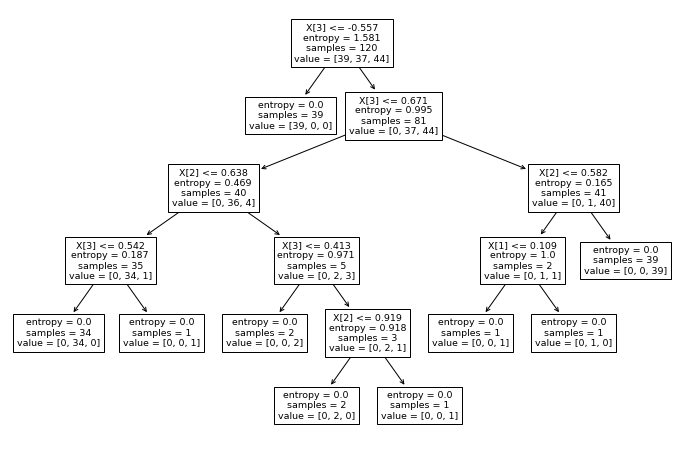

In [10]:
##Visualize decision-trees
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(classifier)

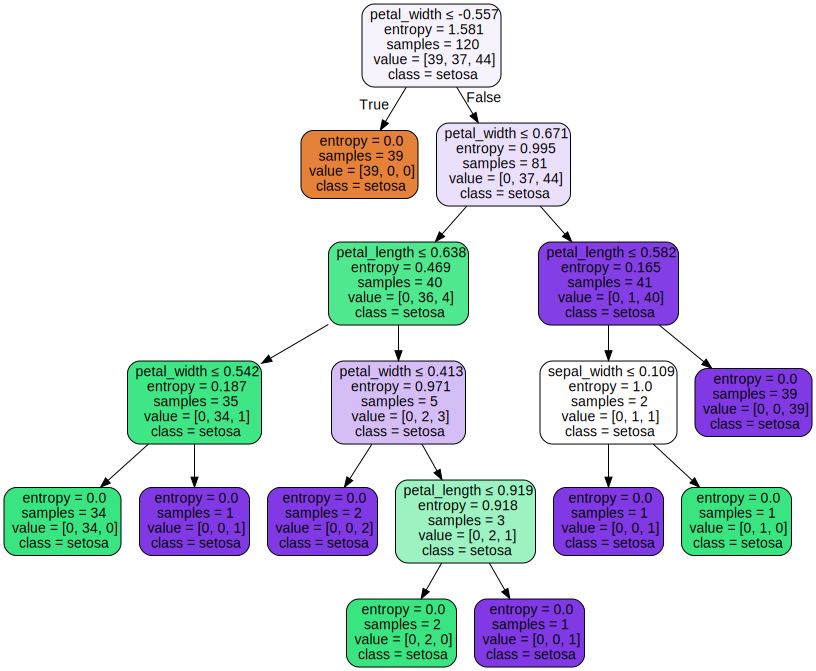

In [11]:
##Visualize decision-trees with graphviz
##execute the command 'sudo apt-get install graphviz' in the terminal
!pip install graphviz
import graphviz 
dot_data = tree.export_graphviz(classifier, out_file=None, 
                              feature_names=df.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 
graph

In [12]:
y_pred= classifier.predict(x_test)  
print(y_pred)

['virginica' 'versicolor' 'setosa' 'virginica' 'setosa' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'virginica' 'versicolor' 'setosa' 'setosa' 'virginica'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa']


4. Test accuracy of the result (Creation of Confusion matrix)

In [13]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


In the above output image, we can see the confusion matrix, which has no incorrect predictions and 11+13+6=30 correct predictions. Therefore, we can say that compared to other classification models, the Decision Tree classifier made a good prediction.

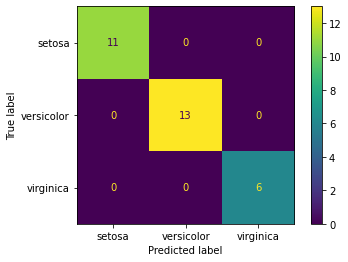

In [14]:
##Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()

In [15]:
###Check accuracy score with criterion entropy
##check test accuracy
from sklearn.metrics import accuracy_score

print('Test accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



Test accuracy score with criterion entropy: 1.0000


In [16]:
##check training accuracy
y_pred_train= classifier.predict(x_train)  
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))


Training-set accuracy score: 1.0000


##Check for overfitting and underfitting
We can see that the training-set score and test-set score is same as above. 
The training-set accuracy score and test-set accuracy to be 1.
So, there is no sign of overfitting.
